<a href="https://colab.research.google.com/github/ShauryaBhardwaj/CSF425/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch

# Machine Learning Models

## Linear Models
## 1. Regression
### 2. Classification

###*Loading data*


Method to load dataset onto google colab for use

In [7]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


Arranging file system and downloading dataset on linux system

In [8]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/
!kaggle datasets download -d dgawlik/nyse
!unzip nyse.zip

 82% 25.0M/30.7M [00:00<00:00, 56.7MB/s]
100% 30.7M/30.7M [00:00<00:00, 62.4MB/s]
Archive:  nyse.zip
  inflating: fundamentals.csv        
  inflating: prices-split-adjusted.csv  
  inflating: prices.csv              
  inflating: securities.csv          


To see file structure on the linux machine

In [9]:
!ls

fundamentals.csv  prices.csv		     sample_data
nyse.zip	  prices-split-adjusted.csv  securities.csv


###*Preprocess data*

Loading data into tabular form using a Python library called Pandas

In [10]:
import pandas as pd
dataframe = pd.read_csv('prices-split-adjusted.csv' , parse_dates=['date']) # parse_dates converts dates in string format to Time-stamp format.
dataframe.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


Selecting Google stocks from the entire Dataframe

In [11]:
google_df = dataframe[dataframe['symbol']=='GOOG'].set_index('date')
google_df.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GOOG,312.304948,312.205308,310.955001,313.580158,3927000.0
2010-01-05,GOOG,312.419511,310.830459,309.610028,312.748278,6031900.0
2010-01-06,GOOG,311.761979,302.994813,302.048370,311.761979,7987100.0
2010-01-07,GOOG,303.562685,295.941242,295.218951,303.861575,12876600.0
2010-01-08,GOOG,294.895159,299.886470,293.455551,300.499172,9483900.0


Matplotlib is used to observe the nature of the data

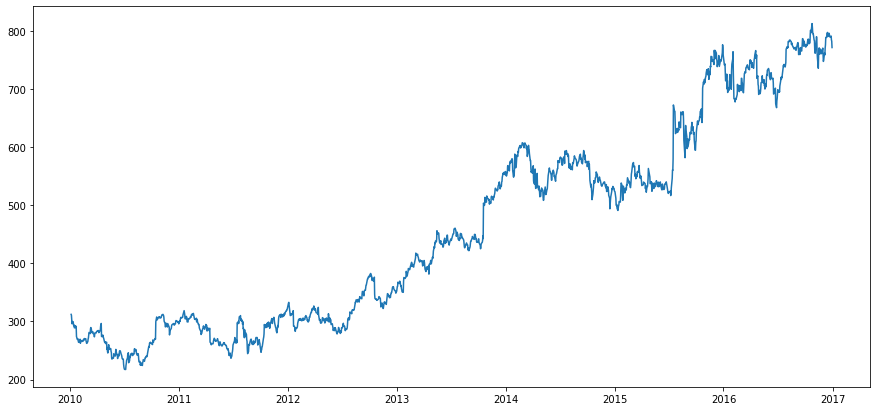

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.plot(google_df.close)

Converts absolute dates to dates relative to the first day

In [13]:
first_day = google_df.index.min()
def calculate_day_since(date, reference=first_day): return (date-reference).days
x=list(map(calculate_day_since,google_df.index))
x[:10]

[0, 1, 2, 3, 4, 7, 8, 9, 10, 11]

Using the 'close' column as the output variable to be predicted. Converting it into a list.

In [14]:
y=list(google_df.close)
y[:10]

[312.20530835799997,
 310.830458632,
 302.994812557,
 295.941242071,
 299.88646988799997,
 299.433161001,
 294.138016503,
 292.449323638,
 293.824173364,
 288.917548598]

Viewing and verifying our data

Text(0.5, 0, 'Days since 4 Jan 2010')

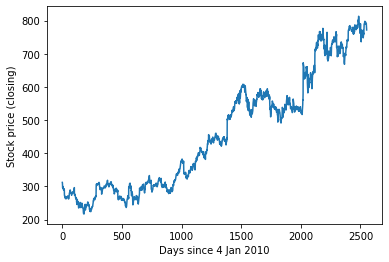

In [15]:
assert len(x)==len(y) 
plt.plot(x,y)
plt.ylabel('Stock price (closing)')
plt.xlabel('Days since 4 Jan 2010')

In [16]:
modified_x = [[i] for i in x] #converting x to a format accepted by LinearRegression model given in sklearn
modified_x[:10]

[[0], [1], [2], [3], [4], [7], [8], [9], [10], [11]]

##Creating and training the model.

### 1. Using Sklearn library

In [17]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(modified_x,y) # LinearRegression() creates a model and fit() function fits the model to the given data
w,b = reg.coef_, reg.intercept_ # The calculated parameters of the line are extracted in variables w and b

def lin_model(x): return x*w + b # by doing this we can simply do lin_model(x0) to find the prediction at day number x0

In [18]:
print(w , b)

[0.22513196] 172.36461228620266


Plotting and verifying our model

Text(0.5, 0, 'Days since 4 Jan 2010')

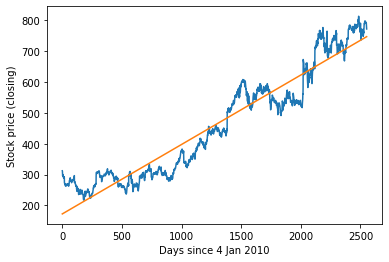

In [19]:
plt.plot(x,y) # original data
plt.plot(x,[lin_model(o) for o in x]) # predicted line
plt.ylabel('Stock price (closing)') 
plt.xlabel('Days since 4 Jan 2010')

### 2. Using Pytorch

Convert data in list form to Tensor form

In [20]:
x_tensor, y_tensor = torch.tensor(x).float(), torch.tensor(y).float()
x_tensor.shape, y_tensor.shape

(torch.Size([1762]), torch.Size([1762]))

Defining the loss function

In [21]:
loss_fn = torch.nn.MSELoss()

def loss_LinearRegression(pred,target):
    assert len(pred)==len(target)
    return loss_fn(pred,target)

Creating a function called model that takes x and parameters(w,b) as inputs and returns w*x + b. 

And a function to perform one iteration of gradient descent

In [22]:
params = torch.tensor([0.,10.]).requires_grad_() # initialising parameters | requires_grads_() associates gradients with these parameters that will be used for gradient descent.

def model(x,params=params):
    w,b = params
    return w*x + b

def train_one_iteration(params,lr=1e-4):
    #step 1: calculate predictions
    preds = model(x_tensor,params)
    # calculate loss between preds and actual y's
    loss= loss_LinearRegression(preds,y_tensor)
    #calculate gradients
    loss.backward()
    #update variables through the gradient descent equation
    params.data-=lr*params.grad.data
    #print('MSE Loss: ', loss_LinearRegression(preds,y_tensor).item())
    #print('w: '+ str(params.data[0]) + ', b: ' + str(params.data[1]))
    params.grad=None

Checking the predictions before training the model

MSE Loss:  232395.9375


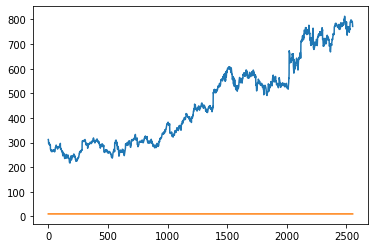

In [23]:
def plot_linreg_model(params):
    plt.plot(x_tensor,y_tensor)
    pred=model(x_tensor,params).detach() # .detach is very important
    plt.plot(x_tensor,pred)
    print('MSE Loss: ', loss_LinearRegression(pred,y_tensor).item())

plot_linreg_model(params) 

Training the model using a for loop and the function train_one_iteration

MSE Loss:  9222.2880859375


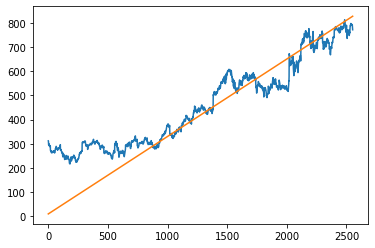

In [24]:
for _ in range(50):
  train_one_iteration(params,lr=2e-7)
plot_linreg_model(params)

## Deployment using Gradio

In [25]:
!pip install gradio

     |████████████████████████████████| 871 kB 22.3 MB/s 
     |████████████████████████████████| 210 kB 51.8 MB/s 
     |████████████████████████████████| 54 kB 2.1 MB/s 
     |████████████████████████████████| 2.0 MB 58.7 MB/s 
     |████████████████████████████████| 52 kB 672 kB/s 
     |████████████████████████████████| 1.1 MB 43.9 MB/s 
     |████████████████████████████████| 160 kB 59.1 MB/s 
     |████████████████████████████████| 271 kB 56.2 MB/s 
     |████████████████████████████████| 144 kB 58.5 MB/s 
     |████████████████████████████████| 58 kB 4.1 MB/s 
     |████████████████████████████████| 10.9 MB 51.0 MB/s 
     |████████████████████████████████| 79 kB 5.8 MB/s 
     |████████████████████████████████| 61 kB 377 kB/s 
     |████████████████████████████████| 856 kB 60.5 MB/s 
     |████████████████████████████████| 3.6 MB 44.4 MB/s 
     |████████████████████████████████| 58 kB 5.0 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=a

In [41]:
def stock_prediction(day):
  w,b = params
  d = torch.tensor(day)
  return (w*d + b).item()

In [43]:
import gradio as gr

iface = gr.Interface(fn=stock_prediction, inputs="number", outputs="number")
iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://41165.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7fd8468aa3d0>,
 'http://127.0.0.1:7864/',
 'https://41165.gradio.app')